<a href="https://colab.research.google.com/github/aletbm/MySolutions_MLOpsZoomcamp2025_DataTalks.Club/blob/main/01_Intro/01_Intro_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st week's homework - by [Alexander Daniel Rios](https://linktr.ee/aletbm)

In [ ]:
!pip install mplcyberpunk -q

## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [ ]:
!wget -O yellow_tripdata_2023-01.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget -O yellow_tripdata_2023-02.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2025-05-17 22:23:46--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.171, 65.8.245.50, 65.8.245.51, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  65.2MB/s    in 0.7s    

2025-05-17 22:23:47 (65.2 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

--2025-05-17 22:23:47--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.8.245.171, 65.8.245.50, 65.8.245.51, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.8.245.171|:443... connected.
HTTP req

In [ ]:
import pandas as pd

df_jan = pd.read_parquet("yellow_tripdata_2023-01.parquet")
df_feb = pd.read_parquet("yellow_tripdata_2023-02.parquet")
df_jan.shape[1]

19

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

* 32.59
* 42.59
* 52.59
* 62.59

In [ ]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
df_jan["duration"] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)
df_jan.duration.std()

42.594351241920904

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

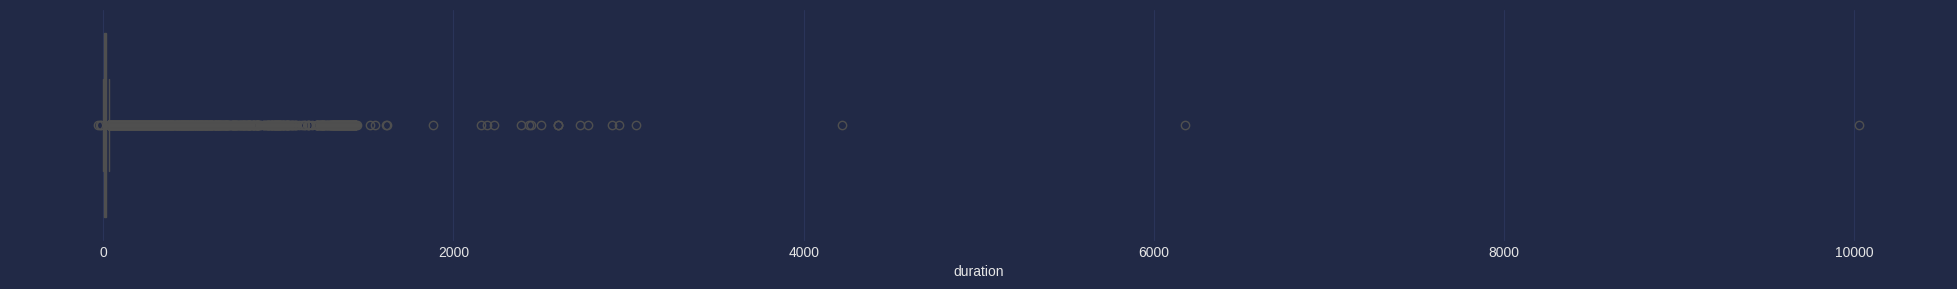

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

plt.style.use("cyberpunk")

plt.figure(figsize=(25, 3))
sns.boxplot(df_jan, x="duration");

In [ ]:
total_records = df_jan.shape[0]
df_jan_clean = df_jan[df_jan.duration.between(1, 60)]
total_records_clean = df_jan_clean.shape[0] *100 / total_records
total_records_clean

98.1220282212598

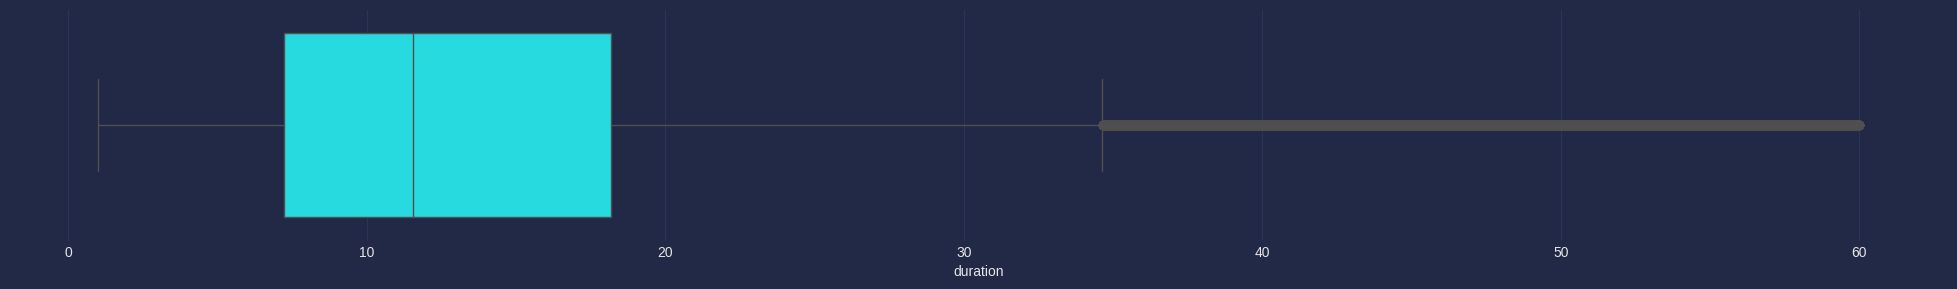

In [ ]:
plt.figure(figsize=(25, 3))
sns.boxplot(df_jan_clean, x="duration");

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will
  label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [ ]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_jan_clean[["PULocationID",	"DOLocationID"]].astype(str).to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train.shape[1]

515

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters, where duration is the response variable
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 3.64
* 7.64
* 11.64
* 16.64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as RMSE

y_train = df_jan_clean["duration"].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

RMSE(y_train, y_pred)

7.649261932106969

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

* 3.81
* 7.81
* 11.81
* 16.81

In [ ]:
df_feb["duration"] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)

df_feb_clean = df_feb[df_feb.duration.between(1, 60)]

val_dicts = df_feb_clean[["PULocationID",	"DOLocationID"]].astype(str).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_val = df_feb_clean["duration"].values

y_pred_val = lr.predict(X_val)

RMSE(y_val, y_pred_val)

7.811818743246608